find size of embedding (last layer of model) for each saved model

preprocess lvl embedding size


In [1]:
import torch
import timm
import sys
sys.path.append('..')
from models.fusion_model import FusionModel
from models.resnet_plus_model import ResNetPlusModel
from pytorch_lightning import LightningDataModule, LightningModule, Trainer
from data.wildlife_dataset import WildlifeDataModule
from wildlife_datasets import analysis, datasets, loader
from data.raptors_wildlife import Raptors


import yaml

# Load config from file
with open("/Users/amee/Documents/code/master-thesis/EagleID/configs/config-hpc-raptors.yml", "r") as f:
    config = yaml.safe_load(f)
# create a config dict
# config = {}
# config['wildlife_name'] = 'raptors'
# config['animal_cat'] = 'bird'
config['dataset'] = '/Users/amee/Documents/code/master-thesis/datasets/raptor_individuals_cropped'
config['cache_path']= '/Users/amee/Documents/code/master-thesis/EagleID/dataset/dataframe/cache_raptors_split.csv' #  CACHE
config['preprocess_lvl'] = 2 # PREPROCESSING
config['batch_size'] = 4
config['num_workers'] = 1
# config['img_size'] =224
# config['transforms'] = {}
# config['transforms']['mean'] = [0.485, 0.456, 0.406]
# config['transforms']['std'] = [0.229, 0.224, 0.225]
# config['split_ratio'] = 0.8
config['splitter'] = 'metadata_split' # CUSTOM CLOSED / metadata
# config['only_cache'] = False # FALSE
# config['arcface_loss'] = {}
# config['arcface_loss']['n_classes'] = 0
# config['custom_transform'] = True
# config['use_gradcam'] = False
config['val_viz'] = True

dataset = Raptors(root=config['dataset'])
dataset.df['wildlife_name'] = 'raptors'
data = WildlifeDataModule(metadata=dataset.df, config = config)

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


Dataset size before pre-processing and cleaning: 509
Removed 0 rows with invalid segmentation data.
Split: closed-set
Samples: train/test/unassigned/total = 382/127/0/509
Classes: train/test/unassigned/total = 69/53/0/69
Classes: train only/test only/joint  = 16/0/53

Fraction of train set     = 75.05%
Fraction of test set only = 0.00%
Training Set
Length: 382
Number of individuals (classes): 69
Mean images/individual: 5.536231884057971
Min images/individual: 2
Max images/individual: 48
Test Set
Length: 127
Number of individuals (classes): 53
Mean images per individual: 2.3962264150943398
Min images per individual: 1
Max images per individual: 8
Loaded mask cache from ../dataset/data_cache/train_raptors_mask.npz: Masks count: 382


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['query'] = df_test['query'].astype(bool)


Loaded primary cache from ../dataset/data_cache/train_raptors_mask.npz: Mask: 382
Precomputed data loaded from bbox_mask for train_raptors. Only to be used for processing lvl 2-5
Precomputed data loaded:
length of metadata: 382
first 5 rows of metadata:
   image_id species  identity_id         identity  \
0       271  goleag         33.0  Alabama_natchez   
1       273  goleag         33.0  Alabama_natchez   
2       274  goleag         33.0  Alabama_natchez   
3       282  goleag         36.0  Bernheim_athena   
4       283  goleag         36.0  Bernheim_athena   

                                                path  from_video  video  date  \
0        goleag/Alabama_natchez/bostonmmountains.jpg       False    NaN  2000   
1           goleag/Alabama_natchez/mfdc6688_crop.jpg       False    NaN  2000   
2                 goleag/Alabama_natchez/Natchez.jpg       False    NaN  2000   
3  goleag/Bernheim_athena/Athena_June2023-scaled.png       False    NaN  2023   
4          goleag/Bern

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
GPU available: True (mps), used:

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'val_dataloader' to speed up the dataloader worker initialization.


Query dataset length: 49
Gallery dataset length: 78
Query labels: [0 1 2 3 4]
Gallery labels: [0 1 1 1 1]


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a).to(device=b.device if isinstance(b, torch.Tensor) else 'cpu')
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b).to(device=a.device)
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


using GPU to compute original distance
starting re_ranking


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'train_dataloader' to speed up the dataloader worker initialization.


Training: |          | 0/? [00:00<?, ?it/s]

Idx 13: Shape mismatch! img_array (710, 366) vs mask (706, 343)


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(a).to(device=b.device if isinstance(b, torch.Tensor) else 'cpu')
/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/metrics.py:116: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(b).to(device=a.device)


Distance matrix type should be np for rerankin: <class 'numpy.ndarray'>
Random mAP: 0.057307310836533225


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_metric_learning/losses/large_margin_softmax_loss.py:109: UserWarning: MPS: nonzero op is supported natively starting from macOS 13.0. Falling back on CPU. This may have performance implications. (Triggered internally at /Users/runner/miniforge3/conda-bld/libtorch_1724557175021/work/aten/src/ATen/native/mps/operations/Indexing.mm:335.)
  cosine_of_target_classes = cosine[mask == 1]
/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Idx 24: Shape mismatch! img_array (390, 716) vs mask (209, 353)
Idx 127: Shape mismatch! img_array (105, 238) vs mask (101, 254)
Idx 19: Shape mismatch! img_array (493, 215) vs mask (484, 189)
Idx 52: Shape mismatch! img_array (332, 148) vs mask (267, 761)
Idx 136: Shape mismatch! img_array (137, 348) vs mask (246, 307)
Idx 47: Shape mismatch! img_array (399, 1110) vs mask (344, 564)
Idx 44: Shape mismatch! img_array (464, 298) vs mask (433, 406)
Idx 116: Shape mismatch! img_array (107, 93) vs mask (121, 68)
Idx 37: Shape mismatch! img_array (372, 691) vs mask (469, 337)
Idx 125: Shape mismatch! img_array (418, 147) vs mask (414, 149)
Idx 165: Shape mismatch! img_array (231, 179) vs mask (275, 110)
Idx 160: Shape mismatch! img_array (95, 100) vs mask (163, 187)


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/pytorch_lightning/utilities/data.py:78: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


Validation: |          | 0/? [00:00<?, ?it/s]

AttributeError: 'Figure' object has no attribute 'save'

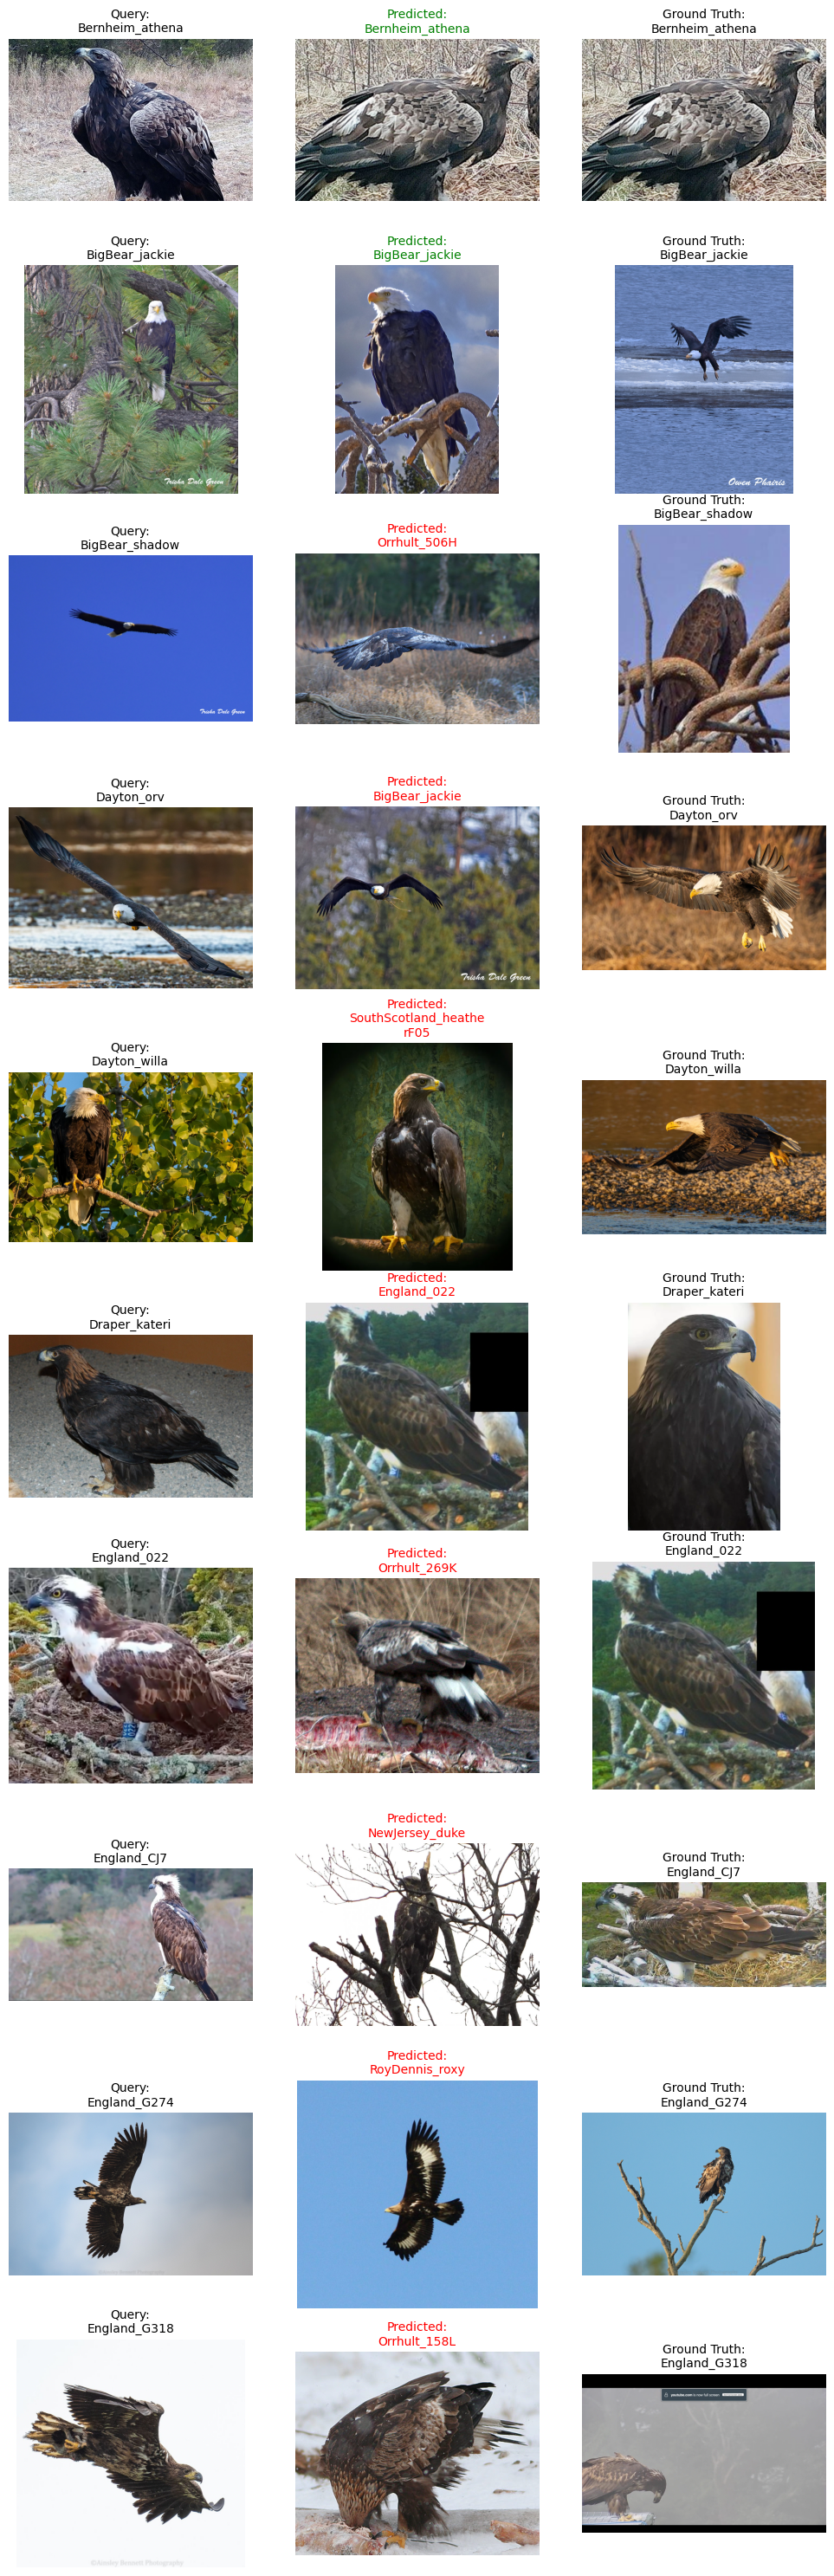

In [4]:
from train import get_basic_callbacks
from utils.viz_callback import SimilarityVizCallback

config['outdir'] = "train_trial_results"
config['use_wandb'] = False

# Path to the saved checkpoint
ckpt_path = "/Users/amee/Documents/code/master-thesis/EagleID/checkpoints/Acrface cosine anealing again lvl2.ckpt"

model = ResNetPlusModel.load_from_checkpoint(
    checkpoint_path=ckpt_path,
    config=config,
)

viz_callback = SimilarityVizCallback(
            config=config, 
            outdir=config['outdir'], 
            log_every_n_epochs=1 
        )
callbacks = [viz_callback] if config['val_viz'] else []

trainer_args = {
        'max_epochs': 1,
        'callbacks': callbacks,
        'default_root_dir': config['outdir'],
        'accelerator': 'mps',
        'deterministic': True,
        'profiler': 'simple',
        'num_sanity_val_steps': -1, # -1 to check all validation data, 0 to turn off
        'precision': "32-true",
    }

trainer = Trainer(**trainer_args)
trainer.fit(model, data)

In [ ]:
from data.combined_datasets import get_dataset

dd = get_dataset({'wildlife_name': 'raptors, BirdIndividualID', 'only_cache': True})
dataset = Raptors(root=config['dataset'])
dataset.df['wildlife_name'] = 'raptors'
data = WildlifeDataModule(metadata=dataset.df, config = config)

# Path to the saved checkpoint
ckpt_path = "/Users/amee/Documents/code/master-thesis/EagleID/checkpoints/multispecies allbirds.ckpt"

model = ResNetPlusModel.load_from_checkpoint(
    checkpoint_path=ckpt_path,
    config=config,
)
# print('in_channels: ',model.backbone.conv1.in_channels)
# checkpoint = torch.load(ckpt_path)

model.eval()  # ensure eval mode

trainer = Trainer(accelerator="mps")
trainer.validate(model, dataloaders=data.val_dataloader())

Dataset size before pre-processing and cleaning: 509
Removed 0 rows with invalid segmentation data.
Split: closed-set
Samples: train/test/unassigned/total = 382/127/0/509
Classes: train/test/unassigned/total = 69/53/0/69
Classes: train only/test only/joint  = 16/0/53

Fraction of train set     = 75.05%
Fraction of test set only = 0.00%
Training Set
Length: 382
Number of individuals (classes): 69
Mean images/individual: 5.536231884057971
Min images/individual: 2
Max images/individual: 48
Test Set
Length: 127
Number of individuals (classes): 53
Mean images per individual: 2.3962264150943398
Min images per individual: 1
Max images per individual: 8
Loaded mask cache from ../dataset/data_cache/train_raptors_mask.npz: Masks count: 382


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../data/wildlife_dataset.py:413: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['query'] = df_test['query'].astype(bool)


Loaded primary cache from ../dataset/data_cache/train_raptors_mask.npz: Mask: 382
Precomputed data loaded from bbox_mask for train_raptors. Only to be used for processing lvl 2-5
Precomputed data loaded:
length of metadata: 382
first 5 rows of metadata:
   image_id species  identity_id         identity  \
0       271  goleag         33.0  Alabama_natchez   
1       273  goleag         33.0  Alabama_natchez   
2       274  goleag         33.0  Alabama_natchez   
3       282  goleag         36.0  Bernheim_athena   
4       283  goleag         36.0  Bernheim_athena   

                                                path  from_video  video  date  \
0        goleag/Alabama_natchez/bostonmmountains.jpg       False    NaN  2000   
1           goleag/Alabama_natchez/mfdc6688_crop.jpg       False    NaN  2000   
2                 goleag/Alabama_natchez/Natchez.jpg       False    NaN  2000   
3  goleag/Bernheim_athena/Athena_June2023-scaled.png       False    NaN  2023   
4          goleag/Bern

/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


RuntimeError: Error(s) in loading state_dict for ResNetPlusModel:
	size mismatch for loss_fn.W: copying a param with shape torch.Size([512, 109]) from checkpoint, the shape in current model is torch.Size([512, 69]).

In [6]:
ckpt = torch.load(ckpt_path, map_location='mps')
print("Checkpoint state_dict:", list(ckpt['state_dict'].keys())[:10])
model = ResNetPlusModel.load_from_checkpoint(checkpoint_path=ckpt_path, config=config)
print("Conv1 weight:", model.backbone.conv1.weight[0, 0, :3, :3].detach().cpu().numpy())
print("Embedding BN mean:", model.embedding[1].running_mean[:5].detach().cpu().numpy())

/var/folders/gx/lbyd01qj4yg41hbq5y7z8j380000gn/T/ipykernel_5940/3867829771.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location='mps

Checkpoint state_dict: ['backbone.conv1.weight', 'backbone.bn1.weight', 'backbone.bn1.bias', 'backbone.bn1.running_mean', 'backbone.bn1.running_var', 'backbone.bn1.num_batches_tracked', 'backbone.layer1.0.conv1.weight', 'backbone.layer1.0.bn1.weight', 'backbone.layer1.0.bn1.bias', 'backbone.layer1.0.bn1.running_mean']


/Users/amee/miniconda3/envs/pytorch_env/lib/python3.12/site-packages/lightning_fabric/utilities/cloud_io.py:57: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.


Conv1 weight: [[-0.02139424 -0.01264519 -0.00547022]
 [-0.01271133  0.02050388  0.04731439]
 [-0.00697363  0.08007031  0.17147252]]
Embedding BN mean: [0.33045927 0.02276565 0.18406662 0.07647935 0.49813408]


In [18]:
# Get the list of DataLoaders (query and gallery)
val_loaders = data.val_dataloader()

# Access the Query DataLoader
query_loader = val_loaders[0]

# Extract a batch from the Query DataLoader
query_batch = next(iter(query_loader))

# Check how many elements are in the batch
print("Number of elements in batch:", len(query_batch))

# Adjust unpacking based on the batch structure (images, labels)
x, y = query_batch

# Forward pass to get output shape
model.eval()
with torch.no_grad():
    output = model(x)

print("Output shape:", output.shape)  # Should print (batch_size, embedding_size)

Number of elements in batch: 2
Output shape: torch.Size([4, 128])


Print predictions for model

In [19]:
from utils.triplet_loss_utils import KnnClassifier
from wildlife_tools.similarity import CosineSimilarity
from wildlife_tools.features import DeepFeatures

from sklearn.metrics import precision_score, recall_score, f1_score
from utils.visualization import query_prediction_results_similarity
import numpy as np


In [20]:
# Evaluate the model in retrieval metrics -- ONLY ONE SPECIES IN DATASET ALREADY (NO FILTERING REQUIRED)
# dataset_database_P = WildlifeDataset(metadata.df.iloc[100:,:], metadata.root, transform=transform)
# dataset_query_P = WildlifeDataset(metadata.df.iloc[:100,:], metadata.root, transform=transform)
dataset_query_P = data.val_query_dataset
dataset_database_P = data.val_gallery_dataset

# name = 'hf-hub:BVRA/MegaDescriptor-T-224'
extractor_P = DeepFeatures(model , device = 'cpu')

query_P, database_P = extractor_P(dataset_query_P), extractor_P(dataset_database_P)

similarity_function = CosineSimilarity()
similarity_P = similarity_function(query_P, database_P)
print(similarity_P)
classifier_P = KnnClassifier(k=1, database_labels=dataset_database_P.labels_string)
predictions_P = classifier_P(similarity_P['cosine'])
print("Predictions for 100 test Images:-\n",predictions_P)
accuracy_P = np.mean(dataset_query_P.labels_string == predictions_P)
print("Accuracy: {:.2f}%".format(accuracy_P * 100))

precision_P = precision_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
recall_P = recall_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
f1_P = f1_score(dataset_query_P.labels_string, predictions_P, average='weighted',zero_division=1)
print("Precision:", precision_P)
print("Recall:", recall_P)
print("F1 Score:", f1_P)

100%|█████████████████████████████████████████████████████████████████| 1/1 [00:20<00:00, 20.42s/it]

{'cosine': array([[ 0.8746631 ,  0.46505708,  0.42394385, ...,  0.8757773 ,
         0.33676684, -0.7084092 ],
       [ 0.5592804 ,  0.91528946,  0.93828565, ...,  0.5564125 ,
         0.9661575 ,  0.6225354 ],
       [ 0.2532197 ,  0.7360814 ,  0.7708305 , ...,  0.25020257,
         0.82549864,  0.84521306],
       ...,
       [ 0.9462284 ,  0.61194706,  0.5747042 , ...,  0.9469324 ,
         0.4954405 , -0.57585114],
       [ 0.9183883 ,  0.5491179 ,  0.5099808 , ...,  0.9195568 ,
         0.42665493, -0.637506  ],
       [ 0.8318452 ,  1.0000002 ,  0.9936341 , ...,  0.8300024 ,
         0.98727214,  0.28510058]], dtype=float32)}
19
93
Predictions for 100 test Images:-
 ['SouthScotland_heatherF05' 'England_022' 'BigBear_shadow' 'Orrhult_269K'
 'England_G318' 'England_G461' 'SouthScotland_shineB44' 'Alabama_natchez'
 'England_G818' 'England_G463' 'England_G818' 'England_G818'
 'SouthScotland_emily121' 'BigBear_jackie' 'SouthScotland_mapleF24'
 'England_022' 'SouthScotland_skanC17' 'So


/Users/amee/Documents/code/master-thesis/EagleID/notebooks/../utils/triplet_loss_utils.py:138: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  results = pd.DataFrame(results).T.fillna(method="ffill").T


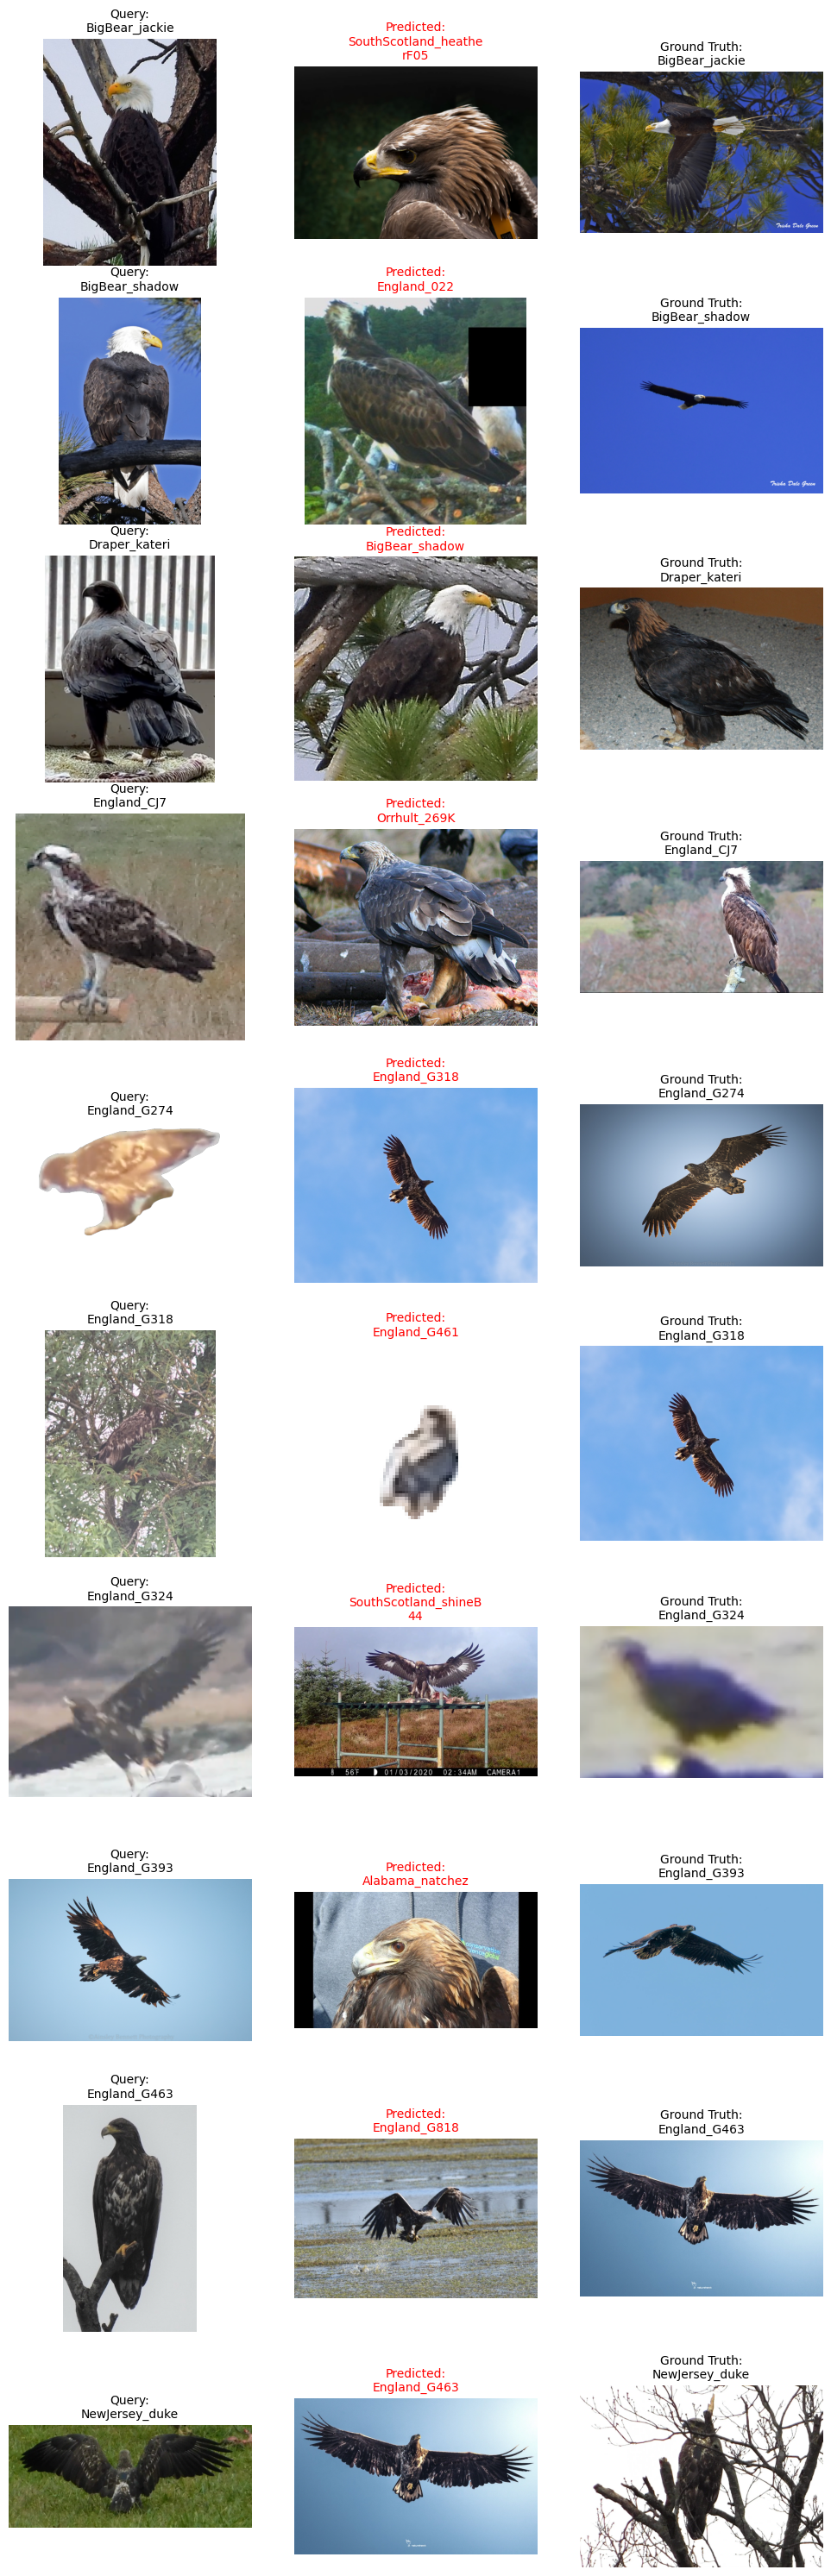

In [21]:
# prediction for dataset with just one species
query_prediction_results_similarity(
    root=config['dataset'],
    query_metadata=dataset_query_P.metadata,
    db_metadata=dataset_database_P.metadata,
    query_start=0,
    similarity_scores=similarity_P['cosine'],
    num_images=10
)